In [1]:
import numpy as np
jobs = np.array(
    [[[[True,  True, False],
        [True, False,  True],
        [True, False,  True],
        [False, False,  True],
        [False,  True,  True]],

      [[False, False,  True],
        [True,  True,  True],
        [False,  True,  True],
        [False, False, False],
        [False,  True, False]]],


      [[[False, False,  True],
        [False,  True, False],
        [True,  True,  True],
        [False, False,  True],
        [False, False, False]],

      [[False, False,  True],
        [True, False, False],
        [True, False,  True],
        [True,  True, False],
        [True, False, False]]],


      [[[True, False, False],
        [False, False,  True],
        [True, False,  True],
        [True,  True, False],
        [False, False,  True]],

      [[True,  True,  True],
        [True, False,  True],
        [True,  True,  True],
        [False, False,  True],
        [False, False, False]]],


      [[[False, False,  True],
        [True,  True, False],
        [False,  True, False],
        [False,  True,  True],
        [True, False, False]],

      [[False,  True, False],
        [False,  True, False],
        [True,  True, False],
        [False, False, False],
        [True, False,  True]]],


      [[[True, False,  True],
        [False,  True,  True],
        [False,  True,  True],
        [True, False, False],
        [True, False,  True]],

      [[True,  True, False],
        [False,  True,  True],
        [False,  True,  True],
        [True, False,  True],
        [True,  True,  True]]]]
)
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

pygame 2.1.2 (SDL 2.0.16, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:

env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
    jobs=np.copy(jobs),
)
obs = env.reset()
print(obs.shape)

action = env.action_space.sample()
print("Action:\n", action)
obs, reward, done, info = env.step(action)
print("Step:\n", obs, reward, done, info)

pygame 2.1.2 (SDL 2.0.16, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
(121,)
Action:
 0
Step:
 [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000    1    1    0    1    0    1    1    0    1    0    0    1
    0    1    1    0    0    1    1    1    1    0    1    1    0    0
    0    0    1    0    0    0    1    0    1    0    1    1    1    0
    0    1    0    0    0    0    0    1    1    0    0    1    0    1
    1    1    0    1    0    0    1    0    0    0    0    1    1    0
    1    1    1    0    0    0    1    1    1    1    1    0    1    1
    1    1    0    0    1    0    0    0    2] -1.0 False {}


In [ ]:
from stable_baselines3.common.env_checker import check_env
env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
    jobs=np.copy(jobs),
)
check_env(env, warn=True)

In [ ]:
from stable_baselines3 import A2C

env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
    jobs=np.copy(jobs),
)

model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10)

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
    jobs=np.copy(jobs),
)
model = A2C('MlpPolicy', env, verbose=1)

evaluate_policy(model, env, n_eval_episodes=2)


In [1]:
from res_mgmt.envs.generator import generate_jobs
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv
import numpy as np

num_resource_type = 10
time_size = 5
resource_size = 10

jobs = generate_jobs(num_resource_type, time_size, resource_size)

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=10,
    max_num_job=10**3,
    jobs=np.copy(jobs),
)

observation = env.reset()
t = 0
while True:
    t += 1
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(t, action)
    env.my_render(f"render/{t}.png")
    if done or t > 50:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()

pygame 2.1.2 (SDL 2.0.16, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
1 10
2 0
3 9
4 8
5 2
6 1
7 8
8 2
9 9
10 2
11 6
12 3
13 6
14 4
15 5
16 2
17 7
18 0
19 5
20 8
21 7
22 5
23 7
24 3
25 3
26 4
27 2
28 1
29 7
30 1
31 2
32 3
33 3
34 9
35 1
36 7
37 7
38 4
39 5
40 8
41 1
42 0
43 10
44 9
45 9
46 0
47 6
48 6
49 3
50 2
51 4
Episode finished after 52 timesteps


(array([ 2076.,  7203., 20071., 40748., 57475., 57639., 40648., 20056.,
         7171.,  2005.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

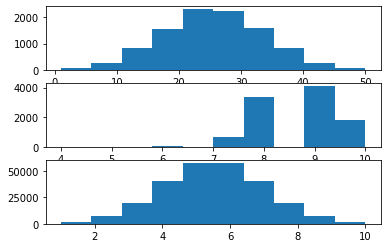

In [82]:
from res_mgmt.generator.generator import generate_jobs
import numpy as np
import matplotlib.pyplot as plt

jobs = generate_jobs(10, 50, 10)
jobs = jobs.reshape(10000, 50, 10)
def duration(image):
    return np.max(np.where(image == True), axis=1)[0] + 1
def max_req(image):
    return np.max(np.where(image == True), axis=1)[1] + 1
def reqs(image):
    t = np.where(image == True)
    if t[0].size == 0:
        return 0
    return np.max(np.where(image == True)) + 1
durstions = [duration(jobs[i]) for i in range(jobs.shape[0])]
max_reqs = [max_req(jobs[i]) for i in range(jobs.shape[0])]
fig, (ax0, ax1, ax2) = plt.subplots(3)
ax0.hist(durstions)
ax1.hist(max_reqs)
jobs = jobs.reshape(500000, 10)
reqss = [reqs(jobs[i]) for i in range(jobs.shape[0]) if reqs(jobs[i]) != 0]
ax2.hist(reqss)



In [2]:
import numpy as np
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

num_resource_type = 10
time_size = 5
resource_size = 10

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=10,
    max_num_job=10**3,
)

# Parallel environments
# env = make_vec_env("CartPole-v1", n_envs=4)

model = A2C(
    "MlpPolicy",
    env,
    verbose=1,
    gamma=1,
    tensorboard_log="./a2c_res_mgmt_tensorboard/",
)
# model.learn(total_timesteps=25000)
model.learn(total_timesteps=1000)
model.save("a2c_res_mgmt")

del model  # remove to demonstrate saving and loading

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./a2c_res_mgmt_tensorboard/A2C_2
-------------------------------------
| time/                 |           |
|    fps                | 3         |
|    iterations         | 100       |
|    time_elapsed       | 158       |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -2.02     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -1.04e+03 |
|    value_loss         | 2.84e+05  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 3        |
|    iterations         | 200      |
|    time_elapsed       | 315      |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -2.07    |
|    explained_variance | 5.96e-0

In [5]:
model = A2C.load("a2c_res_mgmt")

obs = env.reset()
t = 0
max_iteration = 10 ** 5
while True:
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    if t % 100 == 0:
        print(t, action, reward)
        env.my_render(f"render/{t}.png")
    if done or t > max_iteration:
        print("Episode finished after {} timesteps".format(t))
        break
    t += 1

# env.close()

0 1 0
100 10 -233.23333333333332
200 1 0
300 3 -224.10000000000002
400 4 0
500 3 -215.20000000000002
600 4 0
700 3 -205.20000000000002
800 10 -200.20000000000002
900 4 -195.41666666666669
1000 10 0
1100 10 -185.98333333333335
1200 4 -181.18333333333334
1300 6 0
1400 3 -171.55
1500 1 0
1600 3 -162.0666666666667
1700 6 0
1800 3 -153.33333333333334
1900 4 0
2000 9 0
2100 6 -138.56666666666666
2200 10 0
2300 0 -128.6
2400 0 -124.35
2500 3 0
2600 3 -114.46666666666667
2700 4 -109.63333333333334
2800 3 -105.13333333333333
2900 10 -100.93333333333334
3000 6 -95.9
3100 4 0
3200 4 -86.7
3300 6 -82.2
3400 4 -77.8
3500 10 -72.48333333333332
3600 2 -67.73333333333332
3700 10 -63.28333333333333
3800 3 0
3900 3 0
4000 4 -48.78333333333333
4100 3 -44.1
4200 3 -39.75
4300 9 -34.916666666666664
4400 3 0
4500 3 -25.1
4600 3 -20.4
4700 3 0
4800 10 -10.683333333333332
4900 0 -6.683333333333334
5000 5 0
Episode finished after 5091 timesteps


In [7]:
import numpy as np
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

num_resource_type = 3
time_size = 5
resource_size = 5

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=10,
    max_num_job=10**3,
)

# Parallel environments
# env = make_vec_env("CartPole-v1", n_envs=4)

model = A2C(
    "MlpPolicy",
    env,
    verbose=1,
    gamma=1,
    tensorboard_log="./a2c_res_mgmt_tensorboard/",
)

# episode = 10
episode = 2

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=episode, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

# model.learn(total_timesteps=25000)
model.learn(total_timesteps=1000)


mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=episode, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

# env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


KeyboardInterrupt: 